# Report of Assignment 4
The required libraries are:


*   numpy
*   matplotlib.pyplot
*   sklearn


Furkan Oz

foz@okstate.edu

# Question 1

In this question, it is asked to calculate the conditional probability distribution for each feature. This is done in Excel (xlsl) file shared in GitHub along with the code. The procedure is as followed:

First, the data is reordered for apartment, condo, and house in "Reordered" page of the excel. After that, mean and variance are calculated for each feature. For example, local price values for apartment are summed and average is calculated. After that, same is done for condo data and after that house data. Once the mean of local prices are calculated, mean of bathrooms are calculated. Once each feature is done for mean. Variance is calculated in the same way. The calculations are given in "Mean&Variance" page of the excel. 

So far, we calculated mean and variance. For MAP rule, we will need P(Apartment), P(Condo), and P(House). Those are calculated by counting the number of apartment samples, condo samples, and house samples. There are 20 sample in total. 7 of them is apartment. Thus, P(Apartment)=7/20. There are 6 condo sample so P(Condo)=6/20 and with the same method P(House)=7/20. In the MAP rule, denominator is same for all formulas so it will not affect anything. Thus, it is not calculated.

Up to here, we calculated mean and variance of the data and P(Class). Now we need P(X|Class), where X is the features and class is the apartment, condo, or house. Our data is continious so it might be beneficial to use Gauss distribution to calculate the probabilities. However, there are features that take constant values such as bathrooms and number of garages. For those, we assumed they are discrite so the probability is calculated in different manner for these two features. Let's start from Local Prices. We know mean and variance so we can create a gauss distribution as:

$$f(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

where $\sigma$ is variance and $\mu$ is mean. $x$ is the value of corresponding feature. For local prices, gauss distribution is calculated for this equation. It has to be noted that every class has different gauss distribution for same feature as their mean and variance are different. In the code, the procedure will be explained a little more. Now, let's switch to Bathrooms. As mentioned, bathrooms are assumed as discrete so a table is done for it. The table is given in "Probability" page of the excel. The idea is that. First, check number of possible outcomes. In this case, it is 1, 1.5, and 2.5. We have 3 different class which are apartment, condo, and house. Now, we need to count how many, apartment with 1 bathroom. it is 5. How many apartment with 1.5 bathroom. it is 1. and 2.5 bathroom is 1 again. Same thing is for condo and house. Now, to calculate the P(Bathroom(1)|Apartment), we need to check the number of 1 bathroom in apartments to all apartment samples which is 5/7. For P(Bathroom(1.5)|Apartment), it is 1/7. and it is 1/7 for P(Bathroom(2.5)|Apartment). Same thing applies to Condo and House as well. These tables are already given in excel and hardcoded in the code. Now we have everything we need to we can calculate the possibilities.

Now, it is time to go over the codes. First, importing necessary libraries. Then we hardcode mean, variance, and probability of P(Class) as suggested in the question sheet. After that we plot each Gaussian distribution. To plot it, we defined $x$ limits and used aforementioned equation to plot the distribution for each class. Please note that, there are 6 gaussian distribution as 2 of them are not continiuous. 

Lastly, let's explain how to calculate the probability for a test case. For example our first test case sample local price is 6.0931. We have already gaussian distribution for local price for each class. For each class we calculate the probability. Now switching to Bathrooms. We check the probability of the bathroom from the lookup table given in excel under the "Probability" page. And multiply the previously calculated probability. Do the same thing for any other feature up until the last one. Finally we will end up with three different porbabilities which are the multiplication of probabilities of each feature for three different class. We further multiply these 3 probabilities with corresponding P(Class) and check which one is the highest. The highest one is our prediction. The procedure is done like that. The performance of the model is poor because the data sample is less and the test data has some edge cases. The performance on train data is a little better. However, it is not presented in here as it is not asked.

# Question 2
In this question, it is asked to develop a decision tree with Sci-Kit Learn for given data. 

# Part 1)
  The accuracy on the training set is 1.0. The accuracy on the test set is 0.4.

# Part 2)
  7 Different values are tried for max depth and the accuracy obtained are below:

*   Max Depth = 1: The accuracy on the training set is 0.55. The accuracy on the test set is 0.4.
*   Max Depth = 2: The accuracy on the training set is 0.75. The accuracy on the test set is 0.8.
*   Max Depth = 3: The accuracy on the training set is 0.90. The accuracy on the test set is 0.4.
*   Max Depth = 4: The accuracy on the training set is 0.95. The accuracy on the test set is 0.4.
*   Max Depth = 5: The accuracy on the training set is 1.0. The accuracy on the test set is 0.4.
*   Max Depth = 6: The accuracy on the training set is 1.0. The accuracy on the test set is 0.4.
*   Max Depth = 7: The accuracy on the training set is 1.0. The accuracy on the test set is 0.4.

According to results best option is Max depth = 2 as the accuracy is 0.8.

# Part 3)
 Decision trees easily overfit and it overfits very fast with increasing depth. It can be seen from accuracy on training set. It significantly overfits. Thus, limiting the depth is one way to decrease overfitting issue. The reason it affects a lot is that.

# Part 4)
Visualized tree is given below among the codes. Also text version of the tree is given which is:

|--- feature_7 <= 36.00
|   |--- feature_0 <= 8.41
|   |   |--- class: 2
|   |--- feature_0 >  8.41
|   |   |--- class: 0
|--- feature_7 >  36.00
|   |--- feature_0 <= 4.55
|   |   |--- class: 1
|   |--- feature_0 >  4.55
|   |   |--- class: 0


With this logic, the feature_7 for given example is 23 so it is lower than 36. The possible ways for the example reduces to:

|   |--- feature_0 <= 8.41
|   |   |--- class: 2
|   |--- feature_0 >  8.41
|   |   |--- class: 0

Feature 0 of the given example is 9.0384 which is higher that 8.41 so the prediction will be class 0 which is apartment. For the validation, the last code for this question predicts the given data.



# Question 3

In this question, it is asked to develop a k-nearest neighbor algorithm to perform classification. The performance of k-nearest neighbor algorithm with varying k is given in the first code belongs to question 3. Just for the verification, sklearn is also used and same result is obtained in the last code block. According to the results, k=1 performed very poor(accuracy=0.0). k=2 accuracy started to increase(accuracy=0.2). k=3, 4, and 5 showed similar performance (accuracy=0.6). k=1 is overfitting as the disturbance in the data will be also modeled. Chosing optimal k is not an easy task but if we need to choose in between 1-5, I would choose 3 because of the computational power considerations as their performance are identical. 

It has to be noted that the data is scaled with the maximum in each feature. Otherwise, the accuracy was always 0.2. The reason of that is the difference of the units. For example, age of the building is arond 30 but number of garages is around 1. Thus, normalizing is required to obtain a better model.

In [ ]:
################################################################################
################################################################################
##### CS 5783 - Machine Learning                                           #####
##### Assignment - 4                                                       #####
##### Question - 1                                                         #####
#####                                                                      #####
##### 11/18/2022                                                           #####
#####                                                                      #####
##### Furkan Oz                                                            #####
##### foz@okstate.edu                                                      #####
################################################################################
################################################################################
# import copy
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Probabilities, Mean and Variance

P_apartment = 7.0/20.0
P_condo = 6.0/20.0
P_house = 7.0/20.0

Mean_Apartment = np.array([7.332743,1.285714,6.103857,1.505,1.214286,6.857143,3.428571,38.71428])
Mean_Condo = np.array([7.4159,1.333333,6.024667,1.553333,1.333333,6.833333,3.333333,39.66667])
Mean_House = np.array([5.760743,1.071429,6.6309,1.391714,1.071429,6.142857,3.0,34.28571])

Variance_Apartment = np.array([11.20752,0.27551,9.101044,0.424941,0.418367,1.55102,0.816327,184.7755])
Variance_Condo = np.array([17.71967,0.305556,5.396577,0.71062,0.222222,2.138889,0.555556,162.2222])
Variance_House = np.array([0.278604,0.030612,4.335326,0.03886,0.602041,0.408163,0.285714,138.7755])

In [ ]:
# Train and Test Data

x_train = np.array([[4.91760,1  ,3.472,0.998,1,7,4,42],\
                   [5.02080,1  ,3.531,1.500,2,7,4,62],\
                   [4.54290,1  ,2.275,1.175,1,6,3,40],\
                   [4.55730,1  ,4.050,1.232,1,6,3,54],\
                   [5.05970,1  ,4.455,1.121,1,6,3,42],\
                   [3.89100,1  ,4.455,0.988,1,6,3,56],\
                   [5.89800,1  ,5.850,1.240,1,7,3,51],\
                   [5.60390,1  ,9.520,1.501,0,6,3,32],\
                   [16.4202,2.5,9.800,3.420,2,10,5,42],\
                   [14.4598,2.5,12.80,3    ,2,9,5,14],\
                   [5.82820,1  ,6.435,1.225,2,6,3,32],\
                   [5.30030,1  ,4.9883,1.552,1,6,3,30],\
                   [6.27120,1  ,5.520,0.975,1,5,2,30],\
                   [5.95920,1  ,6.666,1.121,2,6,3,32],\
                   [5.05000,1  ,5    ,1.020,0,5,2,46],\
                   [5.60390,1  ,9.520,1.501,0,6,3,32],\
                   [8.24640,1.5,5.150,1.664,2,8,4,50],\
                   [6.69690,1.5,6.902,1.488,1.5,7,3,22],\
                   [7.78410,1.5,7.102,1.376,1,6,3,17],\
                   [9.03840,1  ,7.800,1.500,1.5,7,3,23]])
y_train = np.array([0,2,1,0,0,1,1,2,1,0,2,2,2,1,0,2,0,2,1,0])

x_test = np.array([[6.0931, 1.5, 6.7265, 1.652, 1, 6, 3, 44],\
                   [8.3607,1.5,9.15,1.777,2,8,4,48],\
                   [8.14,1,8,1.504,2,7,3,3],\
                   [9.1416,1.5,7.3262,1.831,1.5,8,4,31],\
                   [12,1.5,5,1.2,2,6,3,30]])
y_test = np.array([0,2,2,0,0])

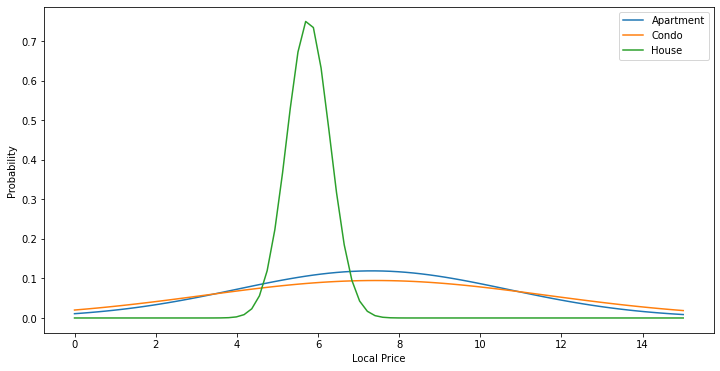

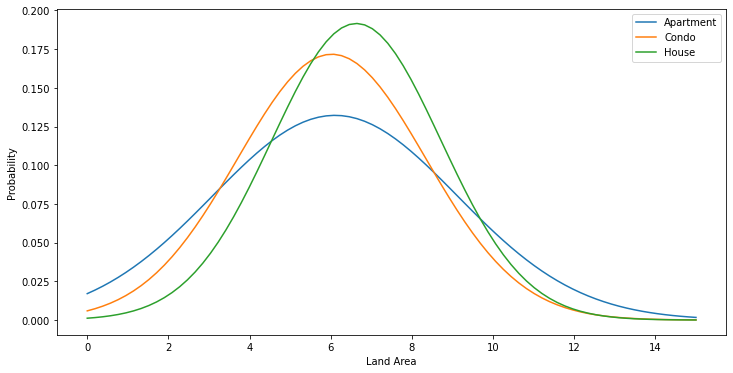

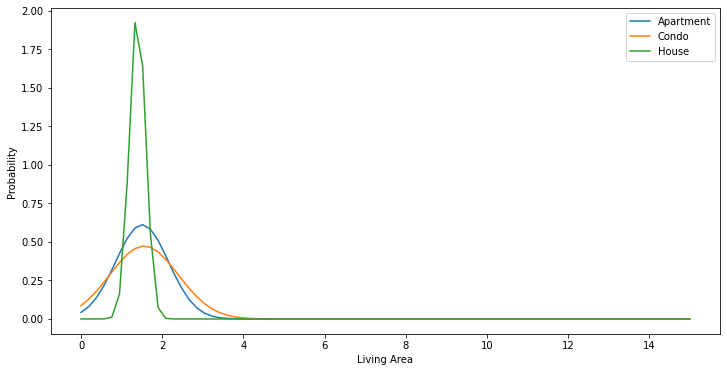

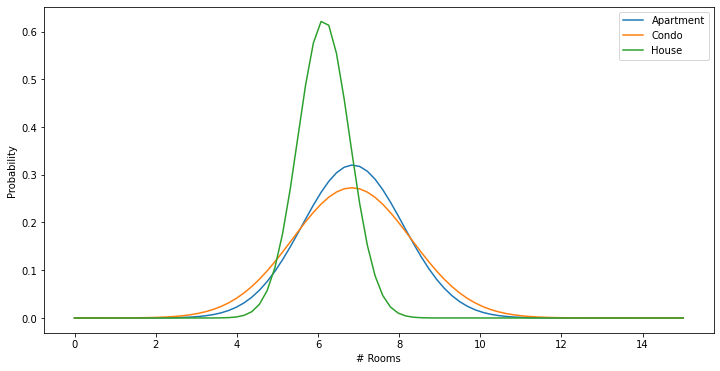

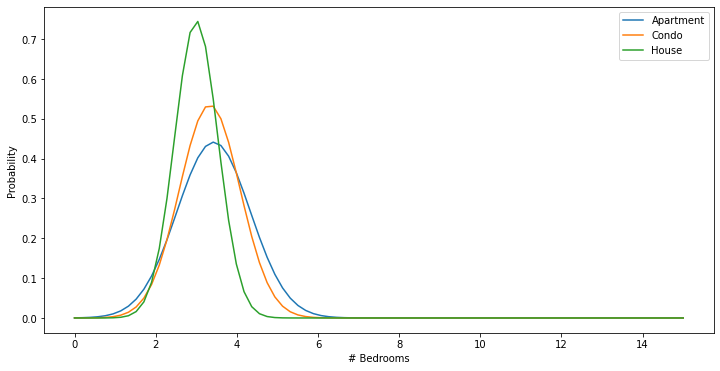

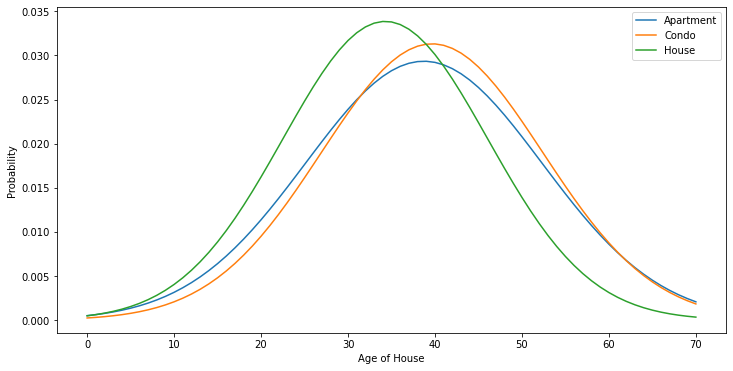

In [ ]:
# Plotting

xx = np.linspace(0,15,80)
for i in range(7):
  if i!=1 and i!=4:
    fig = plt.figure(figsize = (12, 6))
    plt.plot(xx, 1/np.sqrt(2*np.pi*Variance_Apartment[i])*np.exp(-(xx-Mean_Apartment[i])*(xx-Mean_Apartment[i])/2/Variance_Apartment[i]))
    plt.plot(xx, 1/np.sqrt(2*np.pi*Variance_Condo[i])*np.exp(-(xx-Mean_Condo[i])*(xx-Mean_Condo[i])/2/Variance_Condo[i]))
    plt.plot(xx, 1/np.sqrt(2*np.pi*Variance_House[i])*np.exp(-(xx-Mean_House[i])*(xx-Mean_House[i])/2/Variance_House[i]))
    plt.legend(['Apartment', 'Condo', 'House'])
    plt.ylabel("Probability")
    if i==0:
      plt.xlabel("Local Price")
    elif i==1:
      plt.xlabel("Bathroom")
    elif i==2:
      plt.xlabel("Land Area")
    elif i==3:
      plt.xlabel("Living Area")
    elif i==4:
      plt.xlabel("# Garages")
    elif i==5:
      plt.xlabel("# Rooms")
    elif i==6:
      plt.xlabel("# Bedrooms")
    elif i==7:
      plt.xlabel("Age of House")
    
    plt.show()

i=7
xx = np.linspace(0,70,71)
fig = plt.figure(figsize = (12, 6))
plt.plot(xx, 1/np.sqrt(2*np.pi*Variance_Apartment[i])*np.exp(-(xx-Mean_Apartment[i])*(xx-Mean_Apartment[i])/2/Variance_Apartment[i]))
plt.plot(xx, 1/np.sqrt(2*np.pi*Variance_Condo[i])*np.exp(-(xx-Mean_Condo[i])*(xx-Mean_Condo[i])/2/Variance_Condo[i]))
plt.plot(xx, 1/np.sqrt(2*np.pi*Variance_House[i])*np.exp(-(xx-Mean_House[i])*(xx-Mean_House[i])/2/Variance_House[i]))
plt.legend(['Apartment', 'Condo', 'House'])
plt.ylabel("Probability")
plt.xlabel("Age of House")
    
plt.show()

In [ ]:
for j in range(5):
  P_apartment_predict = 1
  P_condo_predict = 1
  P_house_predict = 1
  for i in range(8):
    if i==1:
      if x_test[j,i]==1:
        P_apartment_predict = P_apartment_predict * 5/7
        P_condo_predict = P_condo_predict * 4/6
        P_house_predict = P_house_predict * 6/7
      elif x_test[j,i]==1.5:
        P_apartment_predict = P_apartment_predict * 1/7
        P_condo_predict = P_condo_predict * 1/6
        P_house_predict = P_house_predict * 1/7
      elif x_test[j,i]==2.5:
        P_apartment_predict = P_apartment_predict * 1/7
        P_condo_predict = P_condo_predict * 1/6
        P_house_predict = P_house_predict * 0/7
    if i==4:
      if x_test[j,i]==0:
        P_apartment_predict = P_apartment_predict * 1/7
        P_condo_predict = P_condo_predict * 0/6
        P_house_predict = P_house_predict * 2/7
      elif x_test[j,i]==1:
        P_apartment_predict = P_apartment_predict * 3/7
        P_condo_predict = P_condo_predict * 4/6
        P_house_predict = P_house_predict * 2/7
      elif x_test[j,i]==1.5:
        P_apartment_predict = P_apartment_predict * 1/7
        P_condo_predict = P_condo_predict * 0/6
        P_house_predict = P_house_predict * 1/7
      elif x_test[j,i]==2:
        P_apartment_predict = P_apartment_predict * 2/7
        P_condo_predict = P_condo_predict * 2/6
        P_house_predict = P_house_predict * 2/7
    else:
      P_apartment_predict = P_apartment_predict * 1/np.sqrt(2*np.pi*Variance_Apartment[i])*np.exp(-(x_test[j,i]-Mean_Apartment[i])*(x_test[j,i]-Mean_Apartment[i])/2/Variance_Apartment[i])
      P_condo_predict = P_condo_predict * 1/np.sqrt(2*np.pi*Variance_Condo[i])*np.exp(-(x_test[j,i]-Mean_Condo[i])*(x_test[j,i]-Mean_Condo[i])/2/Variance_Condo[i])
      P_house_predict = P_house_predict * 1/np.sqrt(2*np.pi*Variance_House[i])*np.exp(-(x_test[j,i]-Mean_House[i])*(x_test[j,i]-Mean_House[i])/2/Variance_House[i])
  P_apartment_predict = P_apartment_predict * P_apartment
  P_condo_predict = P_condo_predict * P_condo
  P_house_predict = P_house_predict * P_house
  print("*****************************************")
  print("Data",j+1)
  print("P_apartment",P_apartment_predict)
  print("P_condo",P_condo_predict)
  print("P_house",P_house_predict)
  if P_apartment_predict>=P_condo_predict and P_apartment_predict>=P_house_predict:
    print("Prediction is Apartment")
    if y_test[j]==0:
      print("Correct answer is Apartment")
    elif y_test[j]==1:
      print("Correct answer is Condo")
    elif y_test[j]==2:
      print("Correct answer is House")
  elif P_condo_predict>=P_apartment_predict and P_condo_predict>=P_house_predict:
    print("Prediction is Condo")
    if y_test[j]==0:
      print("Correct answer is Apartment")
    elif y_test[j]==1:
      print("Correct answer is Condo")
    elif y_test[j]==2:
      print("Correct answer is House")
  elif P_house_predict>=P_condo_predict and P_house_predict>=P_apartment_predict:
    print("Prediction is House")
    if y_test[j]==0:
      print("Correct answer is Apartment")
    elif y_test[j]==1:
      print("Correct answer is Condo")
    elif y_test[j]==2:
      print("Correct answer is House")

*****************************************
Data 1
P_apartment 3.495093287071043e-07
P_condo 5.309323364614238e-07
P_house 1.7844081495447369e-06
Prediction is House
Correct answer is Apartment
*****************************************
Data 2
P_apartment 8.938434588483621e-08
P_condo 6.070107012786198e-08
P_house 3.714725789057227e-15
Prediction is Apartment
Correct answer is House
*****************************************
Data 3
P_apartment 4.204437871131908e-08
P_condo 1.3806463132594918e-08
P_house 2.6368365440233136e-10
Prediction is Apartment
Correct answer is House
*****************************************
Data 4
P_apartment 6.42609899887653e-08
P_condo 0.0
P_house 8.931961873521522e-19
Prediction is Apartment
Correct answer is Apartment
*****************************************
Data 5
P_apartment 7.283854997657811e-08
P_condo 1.072470654023998e-07
P_house 1.4313291588467243e-36
Prediction is Condo
Correct answer is Apartment


In [ ]:
################################################################################
################################################################################
##### CS 5783 - Machine Learning                                           #####
##### Assignment - 4                                                       #####
##### Question - 2                                                         #####
#####                                                                      #####
##### 11/18/2022                                                           #####
#####                                                                      #####
##### Furkan Oz                                                            #####
##### foz@okstate.edu                                                      #####
################################################################################
################################################################################
from sklearn import tree

x_train =np.array([[4.91760,1  ,3.472 ,0.998,1  ,7 ,4,42],\
                   [5.02080,1  ,3.531 ,1.500,2  ,7 ,4,62],\
                   [4.54290,1  ,2.275 ,1.175,1  ,6 ,3,40],\
                   [4.55730,1  ,4.050 ,1.232,1  ,6 ,3,54],\
                   [5.05970,1  ,4.455 ,1.121,1  ,6 ,3,42],\
                   [3.89100,1  ,4.455 ,0.988,1  ,6 ,3,56],\
                   [5.89800,1  ,5.850 ,1.240,1  ,7 ,3,51],\
                   [5.60390,1  ,9.520 ,1.501,0  ,6 ,3,32],\
                   [16.4202,2.5,9.800 ,3.420,2  ,10,5,42],\
                   [14.4598,2.5,12.80 ,3    ,2  ,9 ,5,14],\
                   [5.82820,1  ,6.435 ,1.225,2  ,6 ,3,32],\
                   [5.30030,1  ,4.9883,1.552,1  ,6 ,3,30],\
                   [6.27120,1  ,5.520 ,0.975,1  ,5 ,2,30],\
                   [5.95920,1  ,6.666 ,1.121,2  ,6 ,3,32],\
                   [5.05000,1  ,5     ,1.020,0  ,5 ,2,46],\
                   [5.60390,1  ,9.520 ,1.501,0  ,6 ,3,32],\
                   [8.24640,1.5,5.150 ,1.664,2  ,8 ,4,50],\
                   [6.69690,1.5,6.902 ,1.488,1.5,7 ,3,22],\
                   [7.78410,1.5,7.102 ,1.376,1  ,6 ,3,17],\
                   [9.03840,1  ,7.800 ,1.500,1.5,7 ,3,23]])
y_train = np.array([0,2,1,0,0,1,1,2,1,0,2,2,2,1,0,2,0,2,1,0])

x_test = np.array([[6.0931, 1.5, 6.7265, 1.652, 1, 6, 3, 44],\
                   [8.3607,1.5,9.15,1.777,2,8,4,48],\
                   [8.14,1,8,1.504,2,7,3,3],\
                   [9.1416,1.5,7.3262,1.831,1.5,8,4,31],\
                   [12,1.5,5,1.2,2,6,3,30]])
y_test = np.array([0,2,2,0,0])

# Build tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

y_predict_test = clf.predict(x_test)

y_predict_train = clf.predict(x_train)

# Accuracy calculation
accuracy_test = y_predict_test-y_test
accuracy_test = np.count_nonzero(accuracy_test == 0)/5

accuracy_train = y_predict_train-y_train
accuracy_train = np.count_nonzero(accuracy_train == 0)/20

# Print Accuracy
print("Accuracy on test data",accuracy_test)

print("Accuracy on train data",accuracy_train)

Accuracy on test data 0.4
Accuracy on train data 1.0


In [ ]:
# Build tree for max depth 1
clf = tree.DecisionTreeClassifier(max_depth=1)
clf = clf.fit(x_train, y_train)

y_predict_test = clf.predict(x_test)

y_predict_train = clf.predict(x_train)

accuracy_test = y_predict_test-y_test
accuracy_test = np.count_nonzero(accuracy_test == 0)/5

accuracy_train = y_predict_train-y_train
accuracy_train = np.count_nonzero(accuracy_train == 0)/20

print("Accuracy on test data",accuracy_test)

print("Accuracy on train data",accuracy_train)

Accuracy on test data 0.4
Accuracy on train data 0.55


In [ ]:
# Build tree for max depth 2
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(x_train, y_train)

y_predict_test = clf.predict(x_test)

y_predict_train = clf.predict(x_train)

accuracy_test = y_predict_test-y_test
accuracy_test = np.count_nonzero(accuracy_test == 0)/5

accuracy_train = y_predict_train-y_train
accuracy_train = np.count_nonzero(accuracy_train == 0)/20

print("Accuracy on test data",accuracy_test)

print("Accuracy on train data",accuracy_train)

Accuracy on test data 0.8
Accuracy on train data 0.75


In [ ]:
# Build tree for max depth 3
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(x_train, y_train)

y_predict_test = clf.predict(x_test)

y_predict_train = clf.predict(x_train)

accuracy_test = y_predict_test-y_test
accuracy_test = np.count_nonzero(accuracy_test == 0)/5

accuracy_train = y_predict_train-y_train
accuracy_train = np.count_nonzero(accuracy_train == 0)/20

print("Accuracy on test data",accuracy_test)

print("Accuracy on train data",accuracy_train)

Accuracy on test data 0.4
Accuracy on train data 0.9


In [ ]:
# Build tree for max depth 4
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(x_train, y_train)

y_predict_test = clf.predict(x_test)

y_predict_train = clf.predict(x_train)

accuracy_test = y_predict_test-y_test
accuracy_test = np.count_nonzero(accuracy_test == 0)/5

accuracy_train = y_predict_train-y_train
accuracy_train = np.count_nonzero(accuracy_train == 0)/20

print("Accuracy on test data",accuracy_test)

print("Accuracy on train data",accuracy_train)

Accuracy on test data 0.4
Accuracy on train data 0.95


In [ ]:
# Build tree for max depth 5
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(x_train, y_train)

y_predict_test = clf.predict(x_test)

y_predict_train = clf.predict(x_train)

accuracy_test = y_predict_test-y_test
accuracy_test = np.count_nonzero(accuracy_test == 0)/5

accuracy_train = y_predict_train-y_train
accuracy_train = np.count_nonzero(accuracy_train == 0)/20

print("Accuracy on test data",accuracy_test)

print("Accuracy on train data",accuracy_train)

Accuracy on test data 0.4
Accuracy on train data 1.0


In [ ]:
# Build tree for max depth 6
clf = tree.DecisionTreeClassifier(max_depth=6)
clf = clf.fit(x_train, y_train)

y_predict_test = clf.predict(x_test)

y_predict_train = clf.predict(x_train)

accuracy_test = y_predict_test-y_test
accuracy_test = np.count_nonzero(accuracy_test == 0)/5

accuracy_train = y_predict_train-y_train
accuracy_train = np.count_nonzero(accuracy_train == 0)/20

print("Accuracy on test data",accuracy_test)

print("Accuracy on train data",accuracy_train)

Accuracy on test data 0.4
Accuracy on train data 1.0


In [ ]:
# Build tree for max depth 7
clf = tree.DecisionTreeClassifier(max_depth=7)
clf = clf.fit(x_train, y_train)

y_predict_test = clf.predict(x_test)

y_predict_train = clf.predict(x_train)

accuracy_test = y_predict_test-y_test
accuracy_test = np.count_nonzero(accuracy_test == 0)/5

accuracy_train = y_predict_train-y_train
accuracy_train = np.count_nonzero(accuracy_train == 0)/20

print("Accuracy on test data",accuracy_test)

print("Accuracy on train data",accuracy_train)

Accuracy on test data 0.4
Accuracy on train data 1.0


In [ ]:
# Build tree for max depth 2 to visualize
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(x_train, y_train)

y_predict_test = clf.predict(x_test)

y_predict_train = clf.predict(x_train)

accuracy_test = y_predict_test-y_test
accuracy_test = np.count_nonzero(accuracy_test == 0)/5

accuracy_train = y_predict_train-y_train
accuracy_train = np.count_nonzero(accuracy_train == 0)/20

print("Accuracy on test data",accuracy_test)

print("Accuracy on train data",accuracy_train)

Accuracy on test data 0.8
Accuracy on train data 0.75


[Text(0.5, 0.8333333333333334, 'X[7] <= 36.0\ngini = 0.665\nsamples = 20\nvalue = [7, 6, 7]'),
 Text(0.25, 0.5, 'X[0] <= 8.411\ngini = 0.56\nsamples = 10\nvalue = [2, 2, 6]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.75, 0.5, 'X[0] <= 4.55\ngini = 0.58\nsamples = 10\nvalue = [5, 4, 1]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.531\nsamples = 8\nvalue = [5, 2, 1]')]

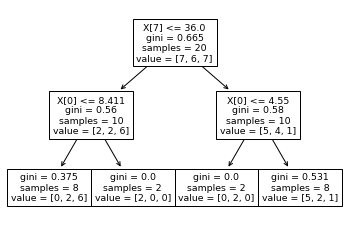

In [ ]:
# Visualize the tree
tree.plot_tree(clf)

In [ ]:
# Print the tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_7 <= 36.00
|   |--- feature_0 <= 8.41
|   |   |--- class: 2
|   |--- feature_0 >  8.41
|   |   |--- class: 0
|--- feature_7 >  36.00
|   |--- feature_0 <= 4.55
|   |   |--- class: 1
|   |--- feature_0 >  4.55
|   |   |--- class: 0



In [ ]:
# Predict the sample given in homework
print(clf.predict([[9.0384,1,7.8,1.5,1.5,7,3,23]]))

[0]


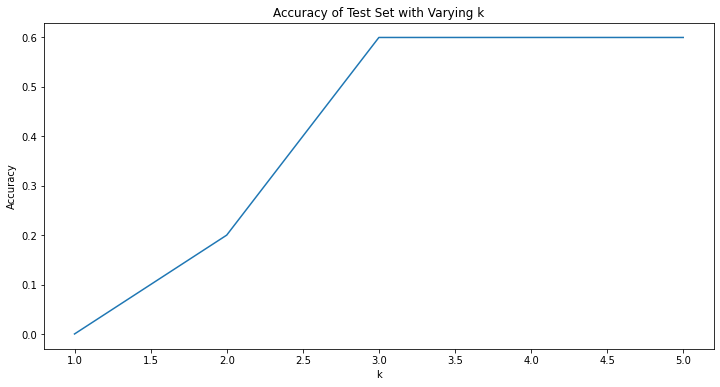

In [ ]:
################################################################################
################################################################################
##### CS 5783 - Machine Learning                                           #####
##### Assignment - 4                                                       #####
##### Question - 3                                                         #####
#####                                                                      #####
##### 11/18/2022                                                           #####
#####                                                                      #####
##### Furkan Oz                                                            #####
##### foz@okstate.edu                                                      #####
################################################################################
################################################################################
def distCalc(x1,x2):
  x1x2 = np.zeros(8)
  x1x2sq = np.zeros(8)
  for i in range(8):
    x1x2[i] = x1[i]-x2[i]
    x1x2sq[i] = x1x2[i]*x1x2[i]
  Distance = np.sqrt(np.sum(x1x2sq))
  return Distance

x_train =np.array([[4.91760,1  ,3.472 ,0.998,1  ,7 ,4,42],\
                   [5.02080,1  ,3.531 ,1.500,2  ,7 ,4,62],\
                   [4.54290,1  ,2.275 ,1.175,1  ,6 ,3,40],\
                   [4.55730,1  ,4.050 ,1.232,1  ,6 ,3,54],\
                   [5.05970,1  ,4.455 ,1.121,1  ,6 ,3,42],\
                   [3.89100,1  ,4.455 ,0.988,1  ,6 ,3,56],\
                   [5.89800,1  ,5.850 ,1.240,1  ,7 ,3,51],\
                   [5.60390,1  ,9.520 ,1.501,0  ,6 ,3,32],\
                   [16.4202,2.5,9.800 ,3.420,2  ,10,5,42],\
                   [14.4598,2.5,12.80 ,3    ,2  ,9 ,5,14],\
                   [5.82820,1  ,6.435 ,1.225,2  ,6 ,3,32],\
                   [5.30030,1  ,4.9883,1.552,1  ,6 ,3,30],\
                   [6.27120,1  ,5.520 ,0.975,1  ,5 ,2,30],\
                   [5.95920,1  ,6.666 ,1.121,2  ,6 ,3,32],\
                   [5.05000,1  ,5     ,1.020,0  ,5 ,2,46],\
                   [5.60390,1  ,9.520 ,1.501,0  ,6 ,3,32],\
                   [8.24640,1.5,5.150 ,1.664,2  ,8 ,4,50],\
                   [6.69690,1.5,6.902 ,1.488,1.5,7 ,3,22],\
                   [7.78410,1.5,7.102 ,1.376,1  ,6 ,3,17],\
                   [9.03840,1  ,7.800 ,1.500,1.5,7 ,3,23]])
y_train = np.array([0,2,1,0,0,1,1,2,1,0,2,2,2,1,0,2,0,2,1,0])

maxx = np.zeros(8)

for i in range(8):
  feature = x_train[:,i]
  maxx[i] = max(feature)
  x_train[:,i] = x_train[:,i]/maxx[i]

x_test = np.array([[6.0931, 1.5, 6.7265, 1.652, 1, 6, 3, 44],\
                   [8.3607,1.5,9.15,1.777,2,8,4,48],\
                   [8.14,1,8,1.504,2,7,3,3],\
                   [9.1416,1.5,7.3262,1.831,1.5,8,4,31],\
                   [12,1.5,5,1.2,2,6,3,30]])
y_test = np.array([0,2,2,0,0])

for i in range(8):
  x_test[:,i] = x_test[:,i]/maxx[i]

accuracy_plot = np.zeros(5)

####### k=1 ##############

Distance = np.zeros(20)
predict = np.ones(5)*99
for j in range(5):
  x1 = x_test[j,:]
  Distance = np.zeros(20)
  predictions = np.ones(1)*99
  for i in range(20):
    x2 = x_train[i,:]
    Distance[i] = distCalc(x1,x2)

  for k in range(1):
    minDist = min(Distance)
    idxMin = np.argmin(Distance)
    predictions[k] = y_train[idxMin]
    Distance = np.delete(Distance, Distance.argmin())
  
  if np.count_nonzero(predictions == 0)>=np.count_nonzero(predictions == 1) and np.count_nonzero(predictions == 0)>=np.count_nonzero(predictions == 2):
    predict[j] = 0
    # print("Data",j+1)
    # print("Prediction is Apartment")
  elif np.count_nonzero(predictions == 1)>=np.count_nonzero(predictions == 0) and np.count_nonzero(predictions == 1)>=np.count_nonzero(predictions == 2):
    predict[j] = 1
    # print("Data",j+1)
    # print("Prediction is Condo")
  elif np.count_nonzero(predictions == 2)>=np.count_nonzero(predictions == 0) and np.count_nonzero(predictions == 2)>=np.count_nonzero(predictions == 1):
    predict[j] = 2
    # print("Data",j+1)
    # print("Prediction is House")

accuracy = predict-y_test
accuracy = np.count_nonzero(accuracy == 0)/5


accuracy_plot[0] = accuracy

####### k=2 ##############

Distance = np.zeros(20)
predict = np.ones(5)*99
for j in range(5):
  x1 = x_test[j,:]
  Distance = np.zeros(20)
  predictions = np.ones(2)*99
  for i in range(20):
    x2 = x_train[i,:]
    Distance[i] = distCalc(x1,x2)

  for k in range(2):
    minDist = min(Distance)
    idxMin = np.argmin(Distance)
    predictions[k] = y_train[idxMin]
    Distance = np.delete(Distance, Distance.argmin())
  
  if np.count_nonzero(predictions == 0)>=np.count_nonzero(predictions == 1) and np.count_nonzero(predictions == 0)>=np.count_nonzero(predictions == 2):
    predict[j] = 0
    # print("Data",j+1)
    # print("Prediction is Apartment")
  elif np.count_nonzero(predictions == 1)>=np.count_nonzero(predictions == 0) and np.count_nonzero(predictions == 1)>=np.count_nonzero(predictions == 2):
    predict[j] = 1
    # print("Data",j+1)
    # print("Prediction is Condo")
  elif np.count_nonzero(predictions == 2)>=np.count_nonzero(predictions == 0) and np.count_nonzero(predictions == 2)>=np.count_nonzero(predictions == 1):
    predict[j] = 2
    # print("Data",j+1)
    # print("Prediction is House")

accuracy = predict-y_test
accuracy = np.count_nonzero(accuracy == 0)/5


accuracy_plot[1] = accuracy

####### k=3 ##############

Distance = np.zeros(20)
predict = np.ones(5)*99
for j in range(5):
  x1 = x_test[j,:]
  Distance = np.zeros(20)
  predictions = np.ones(3)*99
  for i in range(20):
    x2 = x_train[i,:]
    Distance[i] = distCalc(x1,x2)

  for k in range(3):
    minDist = min(Distance)
    idxMin = np.argmin(Distance)
    predictions[k] = y_train[idxMin]
    Distance = np.delete(Distance, Distance.argmin())
  
  if np.count_nonzero(predictions == 0)>=np.count_nonzero(predictions == 1) and np.count_nonzero(predictions == 0)>=np.count_nonzero(predictions == 2):
    predict[j] = 0
    # print("Data",j+1)
    # print("Prediction is Apartment")
  elif np.count_nonzero(predictions == 1)>=np.count_nonzero(predictions == 0) and np.count_nonzero(predictions == 1)>=np.count_nonzero(predictions == 2):
    predict[j] = 1
    # print("Data",j+1)
    # print("Prediction is Condo")
  elif np.count_nonzero(predictions == 2)>=np.count_nonzero(predictions == 0) and np.count_nonzero(predictions == 2)>=np.count_nonzero(predictions == 1):
    predict[j] = 2
    # print("Data",j+1)
    # print("Prediction is House")

accuracy = predict-y_test
accuracy = np.count_nonzero(accuracy == 0)/5

accuracy_plot[2] = accuracy

####### k=4 ##############

Distance = np.zeros(20)
predict = np.ones(5)*99
for j in range(5):
  x1 = x_test[j,:]
  Distance = np.zeros(20)
  predictions = np.ones(4)*99
  for i in range(20):
    x2 = x_train[i,:]
    Distance[i] = distCalc(x1,x2)

  for k in range(4):
    minDist = min(Distance)
    idxMin = np.argmin(Distance)
    predictions[k] = y_train[idxMin]
    Distance = np.delete(Distance, Distance.argmin())
  
  if np.count_nonzero(predictions == 0)>=np.count_nonzero(predictions == 1) and np.count_nonzero(predictions == 0)>=np.count_nonzero(predictions == 2):
    predict[j] = 0
    # print("Data",j+1)
    # print("Prediction is Apartment")
  elif np.count_nonzero(predictions == 1)>=np.count_nonzero(predictions == 0) and np.count_nonzero(predictions == 1)>=np.count_nonzero(predictions == 2):
    predict[j] = 1
    # print("Data",j+1)
    # print("Prediction is Condo")
  elif np.count_nonzero(predictions == 2)>=np.count_nonzero(predictions == 0) and np.count_nonzero(predictions == 2)>=np.count_nonzero(predictions == 1):
    predict[j] = 2
    # print("Data",j+1)
    # print("Prediction is House")

accuracy = predict-y_test
accuracy = np.count_nonzero(accuracy == 0)/5

accuracy_plot[3] = accuracy

####### k=5 ##############

Distance = np.zeros(20)
predict = np.ones(5)*99
for j in range(5):
  x1 = x_test[j,:]
  Distance = np.zeros(20)
  predictions = np.ones(5)*99
  for i in range(20):
    x2 = x_train[i,:]
    Distance[i] = distCalc(x1,x2)

  for k in range(5):
    minDist = min(Distance)
    idxMin = np.argmin(Distance)
    predictions[k] = y_train[idxMin]
    Distance = np.delete(Distance, Distance.argmin())
  
  if np.count_nonzero(predictions == 0)>=np.count_nonzero(predictions == 1) and np.count_nonzero(predictions == 0)>=np.count_nonzero(predictions == 2):
    predict[j] = 0
    # print("Data",j+1)
    # print("Prediction is Apartment")
  elif np.count_nonzero(predictions == 1)>=np.count_nonzero(predictions == 0) and np.count_nonzero(predictions == 1)>=np.count_nonzero(predictions == 2):
    predict[j] = 1
    # print("Data",j+1)
    # print("Prediction is Condo")
  elif np.count_nonzero(predictions == 2)>=np.count_nonzero(predictions == 0) and np.count_nonzero(predictions == 2)>=np.count_nonzero(predictions == 1):
    predict[j] = 2
    # print("Data",j+1)
    # print("Prediction is House")

accuracy = predict-y_test
accuracy = np.count_nonzero(accuracy == 0)/5


accuracy_plot[4] = accuracy

xx = np.linspace(1,5,5)
fig = plt.figure(figsize = (12, 6))
plt.plot(xx, accuracy_plot)
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.title("Accuracy of Test Set with Varying k")
plt.show()

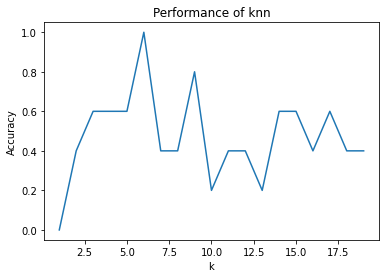

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
def most_common(lst):
    return max(set(lst), key=lst.count)
def euclidean(point, data):
    # Euclidean distance between points a & data
    return np.sqrt(np.sum((point - data)**2, axis=1))
class KNeighborsClassifier:
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

X_train =np.array([[4.91760,1  ,3.472 ,0.998,1  ,7 ,4,42],\
                   [5.02080,1  ,3.531 ,1.500,2  ,7 ,4,62],\
                   [4.54290,1  ,2.275 ,1.175,1  ,6 ,3,40],\
                   [4.55730,1  ,4.050 ,1.232,1  ,6 ,3,54],\
                   [5.05970,1  ,4.455 ,1.121,1  ,6 ,3,42],\
                   [3.89100,1  ,4.455 ,0.988,1  ,6 ,3,56],\
                   [5.89800,1  ,5.850 ,1.240,1  ,7 ,3,51],\
                   [5.60390,1  ,9.520 ,1.501,0  ,6 ,3,32],\
                   [16.4202,2.5,9.800 ,3.420,2  ,10,5,42],\
                   [14.4598,2.5,12.80 ,3    ,2  ,9 ,5,14],\
                   [5.82820,1  ,6.435 ,1.225,2  ,6 ,3,32],\
                   [5.30030,1  ,4.9883,1.552,1  ,6 ,3,30],\
                   [6.27120,1  ,5.520 ,0.975,1  ,5 ,2,30],\
                   [5.95920,1  ,6.666 ,1.121,2  ,6 ,3,32],\
                   [5.05000,1  ,5     ,1.020,0  ,5 ,2,46],\
                   [5.60390,1  ,9.520 ,1.501,0  ,6 ,3,32],\
                   [8.24640,1.5,5.150 ,1.664,2  ,8 ,4,50],\
                   [6.69690,1.5,6.902 ,1.488,1.5,7 ,3,22],\
                   [7.78410,1.5,7.102 ,1.376,1  ,6 ,3,17],\
                   [9.03840,1  ,7.800 ,1.500,1.5,7 ,3,23]])
y_train = np.array([0,2,1,0,0,1,1,2,1,0,2,2,2,1,0,2,0,2,1,0])

maxx = np.zeros(8)

for i in range(8):
  feature = X_train[:,i]
  maxx[i] = max(feature)
  X_train[:,i] = X_train[:,i]/maxx[i]

X_test = np.array([[6.0931, 1.5, 6.7265, 1.652, 1, 6, 3, 44],\
                   [8.3607,1.5,9.15,1.777,2,8,4,48],\
                   [8.14,1,8,1.504,2,7,3,3],\
                   [9.1416,1.5,7.3262,1.831,1.5,8,4,31],\
                   [12,1.5,5,1.2,2,6,3,30]])
y_test = np.array([0,2,2,0,0])

for i in range(8):
  X_test[:,i] = X_test[:,i]/maxx[i]

accuracies = []
ks = range(1, 20)
for k in ks:
    knn = KNeighborsClassifier(k=k)
    knn.fit(X_train, y_train)
    accuracy = knn.evaluate(X_test, y_test)
    accuracies.append(accuracy)
# Visualize accuracy vs. k
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()

In [ ]:
# Variance_Feature1_apartment = 11.20752
# Variance_Feature2_apartment = 0.27551
# Variance_Feature3_apartment = 9.101044
# Variance_Feature4_apartment = 0.424941
# Variance_Feature5_apartment = 0.418367
# Variance_Feature6_apartment = 1.55102
# Variance_Feature7_apartment = 0.816327
# Variance_Feature8_apartment = 184.7755

# Variance_Feature1_condo = 17.71967
# Variance_Feature2_condo = 0.305556
# Variance_Feature3_condo = 5.396577
# Variance_Feature4_condo = 0.71062
# Variance_Feature5_condo = 0.222222
# Variance_Feature6_condo = 2.138889
# Variance_Feature7_condo = 0.555556
# Variance_Feature8_condo = 162.2222

# Variance_Feature1_house = 0.278604
# Variance_Feature2_house = 0.030612
# Variance_Feature3_house = 4.335326
# Variance_Feature4_house = 0.03886
# Variance_Feature5_house = 0.602041
# Variance_Feature6_house = 0.408163
# Variance_Feature7_house = 0.285714
# Variance_Feature8_house = 138.7755

# Mean_Feature1_apartment = 7.332743
# Mean_Feature2_apartment = 1.285714
# Mean_Feature3_apartment = 6.103857
# Mean_Feature4_apartment = 1.505
# Mean_Feature5_apartment = 1.214286
# Mean_Feature6_apartment = 6.857143
# Mean_Feature7_apartment = 3.428571
# Mean_Feature8_apartment = 38.71428

# Mean_Feature1_condo = 7.4159
# Mean_Feature2_condo = 1.333333
# Mean_Feature3_condo = 6.024667
# Mean_Feature4_condo = 1.553333
# Mean_Feature5_condo = 1.333333
# Mean_Feature6_condo = 6.833333
# Mean_Feature7_condo = 3.333333
# Mean_Feature8_condo = 39.66667

# Mean_Feature1_house = 5.760743
# Mean_Feature2_house = 1.071429
# Mean_Feature3_house = 6.6309
# Mean_Feature4_house = 1.391714
# Mean_Feature5_house = 1.071429
# Mean_Feature6_house = 6.142857
# Mean_Feature7_house = 3.0
# Mean_Feature8_house = 34.28571